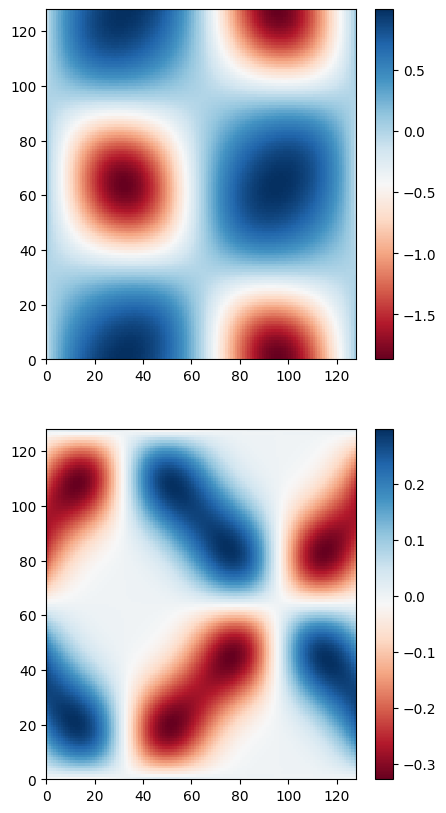

In [ ]:
#importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

#defining the function with concentration 'u' and 'v' and np.meshgrid is used to creat the spatial grid on the dimension nx and ny
# Using separate variables for initialization

def model_start(nx, ny)
    u_init = np.ones((nx, ny))
    v_init = np.zeros((nx, ny))

    x, y = np.meshgrid(np.linspace(0, 1, nx), np.linspace(0, 1, ny))

    pi = np.pi
    u_init = np.sin(2 * pi * x) * np.cos(2 * pi * y)
    v_init = np.cos(2 * pi * x) * np.sin(2 * pi * y)

    return u_init, v_init

#defining periodic_bc function to apply periodic boundary conditions to 'u'. This is for the grid to wrap around at edges
def periodic_bc(u):
    u[0, :] = u[-2, :]
    u[-1, :] = u[1, :]
    u[:, 0] = u[:, -2]
    u[:, -1] = u[:, 1]

#a function is defined to calculate the Laplacian using five-point stencil scheme(a finite difference approximation for the Laplace operator)
def five_point_scheme(u):
    """
    Five point scheme
    """
    return (                  u[ :-2, 1:-1] +
             u[1:-1, :-2] - 4*u[1:-1, 1:-1] + u[1:-1, 2:] +
                          +   u[2:  , 1:-1] )

#This function integrates the model by computing Laplacians, introducing the reaction terms and updating 'u' and 'v' over time using the ultimate reaction-difussion equations.
def integrate_model(U, V, params):
    dt, Du, Dv, F, k = params

    u, v = U[1:-1, 1:-1], V[1:-1, 1:-1]

    Lu = five_point_scheme(U)
    Lv = five_point_scheme(V)

    u += dt * (Du * (Lu + (u - u**2 - u*v)))
    v += dt * (Dv * (Lv + (-v + u*v)))

    periodic_bc(U)
    periodic_bc(V)

# An array of parameters is passed to the integrators
params = np.array([0.5, 0.15, 0.55, 0.25, 0.62])

# Initializing the model
U, V = model_start(128, 128)

# Time-stepping loop which runs for 4 time steps to use the 'integrate_model' function in each iteration to simulate the evolution of 'u' and 'v' over time.
for t in range(4):
    integrate_model(U, V, params)

# Plotting the result
plt.figure(figsize=(5, 10))
plt.subplot(2, 1, 1)
plt.pcolormesh(U, cmap='RdBu')
plt.colorbar()
plt.subplot(2, 1, 2)
plt.pcolormesh(V, cmap='RdBu')
plt.colorbar()
plt.show()


The code uses nonlinear reaction terms and a finite difference approach for diffusion to simulate a reaction-diffusion system with periodic boundary conditions. Seeing the spatial patterns of the concentrations is made easier by the display at the end. The behavior of the system can be changed by modifying the parameters in the params array.

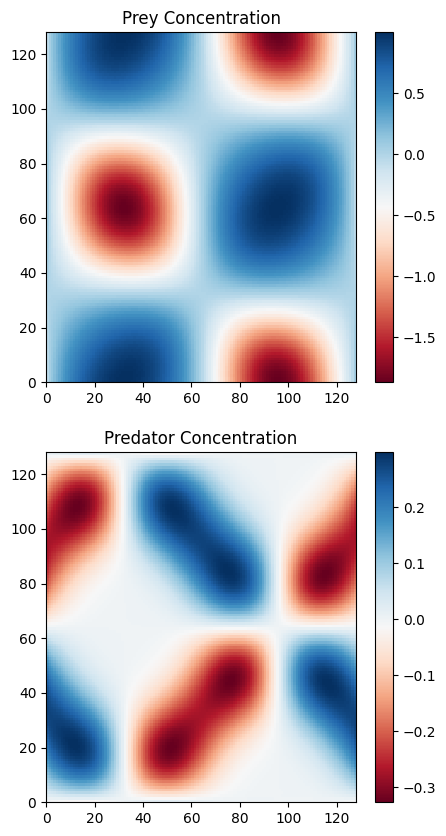

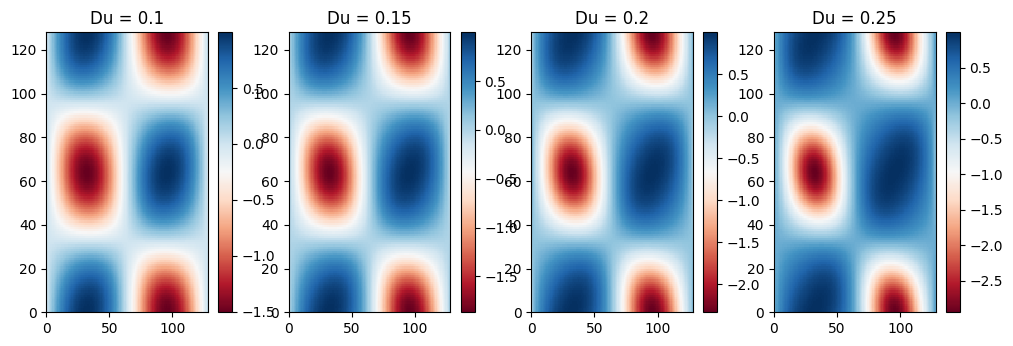

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def model_start(nx, ny):
    u_init = np.ones((nx, ny))
    v_init = np.zeros((nx, ny))

    x, y = np.meshgrid(np.linspace(0, 1, nx), np.linspace(0, 1, ny))

    pi = np.pi
    u_init = np.sin(2 * pi * x) * np.cos(2 * pi * y)
    v_init = np.cos(2 * pi * x) * np.sin(2 * pi * y)

    return u_init, v_init

def periodic_bc(u):
    u[0, :] = u[-2, :]
    u[-1, :] = u[1, :]
    u[:, 0] = u[:, -2]
    u[:, -1] = u[:, 1]

def five_point_scheme(u):
    """
    Five point scheme
    """
    return (                  u[ :-2, 1:-1] +
             u[1:-1, :-2] - 4*u[1:-1, 1:-1] + u[1:-1, 2:] +
                          +   u[2:  , 1:-1] )

def integrate_model(U, V, params):
    dt, Du, Dv, F, k = params

    u, v = U[1:-1, 1:-1], V[1:-1, 1:-1]

    Lu = five_point_scheme(U)
    Lv = five_point_scheme(V)

    u += dt * (Du * (Lu + (u - u**2 - u*v)))
    v += dt * (Dv * (Lv + (-v + u*v)))

    periodic_bc(U)
    periodic_bc(V)

params = np.array([0.5, 0.15, 0.55, 0.25, 0.62])

# Initializing the model
U, V = model_start(128, 128)

# Time-stepping loop for 4 time steps
for t in range(4):
    integrate_model(U, V, params)

# Plotting the result
plt.figure(figsize=(5, 10))
plt.subplot(2, 1, 1)
plt.pcolormesh(U, cmap='RdBu')
plt.colorbar()
plt.title('Prey Concentration')

plt.subplot(2, 1, 2)
plt.pcolormesh(V, cmap='RdBu')
plt.colorbar()
plt.title('Predator Concentration')

plt.show()

# Performing a sensitivity analysis for Du by changing parameters
du_values = [0.1, 0.15, 0.2, 0.25]
plt.figure(figsize=(12, 8))

for du in du_values:
    #Adding Du in the parameters
    params_sensitivity = np.array([0.5, du, 0.55, 0.25, 0.62])

    # Initializing new model
    U_sensitivity, V_sensitivity = model_start(128, 128)

    # Time-stepping
    for t in range(4):
        integrate_model(U_sensitivity, V_sensitivity, params_sensitivity)

    # Plotting the result for the perturbed Du and comparing the sensitivity with Prey and Predator Concentration plots

    plt.subplot(2, len(du_values), du_values.index(du) + 1)
    plt.pcolormesh(U_sensitivity, cmap='RdBu')
    plt.colorbar()
    plt.title(f'Du = {du}')

plt.show()


Here, we can see with each iteration for different du values the model slightly changes which means it is not too sensitive to the change of parameters.

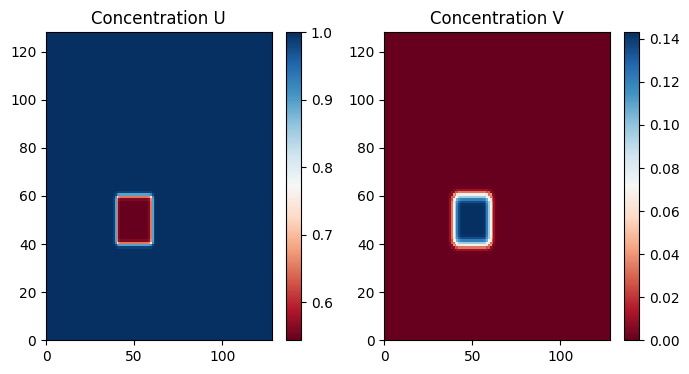

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def model_start(nx, ny):
    u = np.ones((nx, ny))
    v = np.zeros((nx, ny))

    #grid
    x, y = np.meshgrid(np.linspace(0, 1, nx), np.linspace(0, 1, ny))


    u[40:60, 40:60] = 0.5
    v[40:60, 40:60] = 0.25

    return u, v

def periodic_bc(u):
    u[0, :] = u[-2, :]
    u[-1, :] = u[1, :]
    u[:, 0] = u[:, -2]
    u[:, -1] = u[:, 1]

def five_point_scheme(u):
    return (                  u[ :-2, 1:-1] +
             u[1:-1, :-2] - 4*u[1:-1, 1:-1] + u[1:-1, 2:] +
                          +   u[2:  , 1:-1] )

def integrate_model(U, V, params):
    dt, Du, Dv, F, k = params

    u, v = U[1:-1, 1:-1], V[1:-1, 1:-1]

    Lu = five_point_scheme(U)
    Lv = five_point_scheme(V)

    # Update equations with non-linear terms
    u += dt * (Du * (Lu + (u - u**2 - u*v)))
    v += dt * (Dv * (Lv + (-v + u*v)))

    periodic_bc(U)
    periodic_bc(V)

# An array of parameters is passed to the integrators
params = np.array([0.5, 0.15, 0.55, 0.25, 0.62])

# Initialize model
U, V = model_start(128, 128)

# Time-stepping
for t in range(4):
    integrate_model(U, V, params)

# Plot the result
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.pcolormesh(U, cmap='RdBu')
plt.colorbar()
plt.title('Concentration U')

plt.subplot(1, 2, 2)
plt.pcolormesh(V, cmap='RdBu')
plt.colorbar()
plt.title('Concentration V')

plt.show()
